# Multi-class Classification Problem

# 1)-Importing key modules

In [1]:
import warnings
warnings.filterwarnings('ignore')
# For processing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
import seaborn as sns
plt.rcParams["figure.figsize"] = (16, 10)
plt.rcParams["xtick.labelsize"] = 10
plt.figure(figsize=(16,10)) # this creates a figure 16 inch wide, 10 inch high
from pprint import pprint
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# For modeling building and tunning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
# for deep learning if I will have time

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [4]:
# for evaluation

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# 2)-Loading data

In [5]:
df = pd.read_csv('train.csv')
df=df.drop('Unnamed: 0',axis=1)
df.shape

(7352, 566)

In [6]:
df.columns

Index(['v0', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9',
       ...
       'v556', 'v557', 'v558', 'v559', 'v560', 'v561', 'v562', 'v563', 'v564',
       'label'],
      dtype='object', length=566)

In [7]:
df.head()

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v556,v557,v558,v559,v560,v561,v562,v563,v564,label
0,0,f,-0.132905,-0.995279,-0.983111,0,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,A,0.288585,-0.913526,-0.020294,2
1,1,f,-0.123520,-0.998245,-0.975300,0,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.732626,0.703511,-0.844788,0.180289,-0.054317,A,0.278419,-0.960322,-0.016411,2
2,2,f,-0.113462,-0.995380,-0.967187,0,-0.996520,-0.963668,-0.977469,-0.938692,...,0.100699,0.808529,-0.848933,0.180637,-0.049118,A,0.279653,-0.978944,-0.019467,2
3,3,f,-0.123283,-0.996091,-0.983403,0,-0.997099,-0.982750,-0.989302,-0.938692,...,0.640011,-0.485366,-0.848649,0.181935,-0.047663,A,0.279174,-0.990675,-0.026201,2
4,4,f,-0.115362,-0.998139,-0.980817,0,-0.998321,-0.979672,-0.990441,-0.942469,...,0.693578,-0.615971,-0.847865,0.185151,-0.043892,A,0.276629,-0.990482,-0.016570,2


In [8]:
df_test = pd.read_csv('test.csv')
df_test=df_test.drop('Unnamed: 0',axis=1)
df_test.shape

(2947, 566)

In [9]:
df_test.head()

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v556,v557,v558,v559,v560,v561,v562,v563,v564,label
0,0,i,-0.014654,-0.938404,-0.920091,0,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.825886,0.271151,-0.720009,0.276801,-0.057978,B,0.257178,-0.667683,-0.023285,2
1,1,h,-0.119083,-0.975415,-0.967458,0,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.434375,0.920593,-0.698091,0.281343,-0.083898,B,0.286027,-0.944958,-0.013163,2
2,2,h,-0.118152,-0.993819,-0.969926,0,-0.994403,-0.970735,-0.963483,-0.939260,...,0.064103,0.145068,-0.702771,0.280083,-0.079346,B,0.275485,-0.962748,-0.026050,2
3,3,f,-0.117520,-0.994743,-0.973268,0,-0.995274,-0.974471,-0.968897,-0.938610,...,0.340134,0.296407,-0.698954,0.284114,-0.077108,B,0.270298,-0.967091,-0.032614,2
4,4,e,-0.129527,-0.993852,-0.967445,0,-0.994111,-0.965953,-0.977346,-0.938610,...,0.736715,-0.118545,-0.692245,0.290722,-0.073857,B,0.274833,-0.978295,-0.027848,2


So, there is label feature as well. It means that this dataset is more of validation dataset to test how my model performed versus what test dataset has.

Mostly test dataset are out of sample with no target value at all. 

# 3)- Data Exploring

### 3.1)- Check data type

In [10]:
# Checking all variables with their data-type
def _tbl_dtype(dataset):
    sum_dtype = pd.DataFrame(dataset.dtypes).sort_values(0).rename(columns = {0:'Data Type'})
    return sum_dtype

table_dtype = _tbl_dtype(df)
table_dtype

,Data Type
v0,int64
v5,int64
label,int64
v3,float64
v386,float64
...,...
v193,float64
v187,float64
v282,float64
v561,object


We have too many columns to observe. It is unwise to look and assume that all variables are int or float. Some exploration is needed

In [11]:
df.v1.dtype

dtype('O')

So we have an object. Lets see what it contains

In [12]:
df.v1[:5]

0    f
1    f
2    f
3    f
4    f
Name: v1, dtype: object

What are these "f"? Are they classes or categories ?

In [13]:
df.v1.value_counts()

d    1407
f    1374
e    1286
g    1226
i    1073
h     986
Name: v1, dtype: int64

Yes it seems like that these are classess. There is no information what do they mean or what even features mean? We shall try to deal with them as categorical variables are dealt

**Problem is that this dataset has too much to see and one by one exploration is not possible**

### 3.2 Check Data Description

In [14]:
df.describe()

,v0,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v555,v556,v557,v558,v559,v560,v562,v563,v564,label
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.0,7352.000000,7352.000000,7351.000000,7352.000000,7345.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,3675.500000,-0.109141,-0.605438,-0.510938,0.0,-0.630512,-0.526907,-0.606191,-0.468604,-0.305875,...,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,0.274488,-0.604754,-0.017695,2.315152
std,2122.483922,0.056635,0.448734,0.502645,0.0,0.424073,0.485942,0.414135,0.544547,0.282282,...,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,0.070261,0.418687,0.040811,1.690628
min,0.000000,-1.000000,-1.000000,-0.999873,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,1837.750000,-0.120993,-0.992754,-0.978129,0.0,-0.993591,-0.978162,-0.980252,-0.936219,-0.563530,...,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,0.262975,-0.980233,-0.024863,1.000000
50%,3675.500000,-0.108676,-0.946196,-0.851897,0.0,-0.950709,-0.857328,-0.857244,-0.881637,-0.479508,...,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,0.277193,-0.859365,-0.017219,2.000000
75%,5513.250000,-0.097794,-0.242813,-0.034231,0.0,-0.292680,-0.066701,-0.265598,-0.017129,-0.065161,...,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,0.288461,-0.262415,-0.010783,4.000000
max,7351.000000,1.000000,1.000000,0.916238,0.0,1.000000,0.967664,1.000000,1.000000,1.000000,...,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,1.000000,1.000000,1.000000,5.000000


We can find very quickly what are minimum values and what are maximum values. This gives us idea about peak and dip point irrespective of units. As these features are not known so, we cannot find any description out of them or any statistic analysis.

### 3.3)- Check categorical variables

In [15]:
df.describe(include=['object', 'bool'])

,v1,v561
count,7352,7352
unique,6,21
top,d,Y
freq,1407,409


In [16]:
df.v561.dtype

dtype('O')

Here we found one more interesting variable.What is it in terms of data type? Is it int, object or what?

In [17]:
df.v561.value_counts()

Y     409
U     408
Z     392
AD    383
AB    382
AA    376
W     372
Q     368
P     366
S     360
A     347
AC    344
C     341
O     328
F     325
N     323
V     321
K     316
G     308
E     302
H     281
Name: v561, dtype: int64

These values are also categories 

In [18]:
# Checking for double check
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

v1       6
v561    21
dtype: int64

### 3.4)- Encode categorical feature 


In [19]:
v = pd.get_dummies(df.v1, sparse=True)
v

,d,e,f,g,h,i
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
7347,0,0,0,0,0,1
7348,0,0,0,0,0,1
7349,0,0,0,0,0,1
7350,0,0,0,0,0,1


In [20]:
x = pd.get_dummies(df.v561, sparse=True)
x

,A,AA,AB,AC,AD,C,E,F,G,H,...,N,O,P,Q,S,U,V,W,Y,Z
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7348,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7349,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7350,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df=pd.get_dummies(df,columns=['v1'], drop_first=True)
df=pd.get_dummies(df,columns=['v561'], drop_first=True)

In [22]:
df.shape

(7352, 589)

### 3.4)- Missing values

In [23]:
def summary_missing(dataset):
    n_miss = dataset.isnull().sum()
    n_obs = dataset.shape[0]
    n_miss_per = n_miss/n_obs*100
    n_miss_tbl = pd.concat([n_miss, n_miss_per], axis = 1).sort_values(1, ascending = False).round(1)
    n_miss_tbl = n_miss_tbl[n_miss_tbl[1] != 0]
    print('No. of fields: ', dataset.shape[0])
    print('No. of missing fields: ', n_miss_tbl.shape[0])
    n_miss_tbl = n_miss_tbl.rename(columns = {0:'No. of mising Value', 1:'%age of missing Value'})
    return n_miss_tbl

summary_missing(df)

No. of fields:  7352
No. of missing fields:  7


,No. of mising Value,%age of missing Value
v15,20,0.3
v14,19,0.3
v11,16,0.2
v13,12,0.2
v10,7,0.1
v12,5,0.1
v17,4,0.1


In [24]:
df.v3[:5]

0   -0.995279
1   -0.998245
2   -0.995380
3   -0.996091
4   -0.998139
Name: v3, dtype: float64

There are some missing values and we need to solve this problem

In [25]:
df.v17[:5]

0   -0.999863
1   -0.999788
2   -0.999660
3   -0.999736
4   -0.999856
Name: v17, dtype: float64

In [26]:
df.loc[df.isnull().sum()]

,v0,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v561_N,v561_O,v561_P,v561_Q,v561_S,v561_U,v561_V,v561_W,v561_Y,v561_Z
0,0,-0.132905,-0.995279,-0.983111,0,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,...,0,0,0,0,0,0,0,0,0,0
0,0,-0.132905,-0.995279,-0.983111,0,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,...,0,0,0,0,0,0,0,0,0,0
0,0,-0.132905,-0.995279,-0.983111,0,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,...,0,0,0,0,0,0,0,0,0,0
0,0,-0.132905,-0.995279,-0.983111,0,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,...,0,0,0,0,0,0,0,0,0,0
0,0,-0.132905,-0.995279,-0.983111,0,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,-0.132905,-0.995279,-0.983111,0,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,...,0,0,0,0,0,0,0,0,0,0
0,0,-0.132905,-0.995279,-0.983111,0,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,...,0,0,0,0,0,0,0,0,0,0
0,0,-0.132905,-0.995279,-0.983111,0,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,...,0,0,0,0,0,0,0,0,0,0
0,0,-0.132905,-0.995279,-0.983111,0,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,...,0,0,0,0,0,0,0,0,0,0


In [27]:
col_mask=df.isnull().any(axis=0) 

In [28]:
row_mask=df.isnull().any(axis=1)

In [29]:
df.loc[row_mask,col_mask]

,v8,v10,v11,v12,v13,v14,v15,v16,v17,v18
85,-0.204493,-0.102134,-0.176986,0.094155,0.109592,NaN,-0.101385,-0.714917,-0.782954,-0.716864
86,-0.095763,-0.145546,-0.193157,0.280536,-0.023057,NaN,-0.148596,-0.789177,-0.813002,-0.656698
87,-0.233326,-0.173889,-0.126654,0.280536,-0.023057,NaN,-0.106409,-0.727085,-0.760976,-0.718639
120,-0.277213,0.084098,-0.099875,0.094599,0.025585,NaN,-0.235228,-0.799426,-0.835261,-0.753874
128,-0.318214,-0.034024,-0.372518,0.210398,-0.228288,NaN,-0.105281,-0.623365,-0.752514,-0.798732
...,...,...,...,...,...,...,...,...,...,...
7033,-0.990474,-0.545385,NaN,0.838980,0.669255,0.844922,-0.989612,-0.999909,-0.999696,-0.999810
7037,-0.993809,-0.568640,NaN,0.848479,0.693304,0.844290,-0.995626,-0.999952,-0.999977,-0.999890
7085,-0.213152,-0.218644,-0.281534,0.343670,0.268251,0.290204,NaN,-0.837644,-0.893945,-0.684714
7095,-0.180210,-0.112970,-0.297452,0.329200,0.293539,NaN,-0.261934,-0.824597,-0.883758,-0.691359


These are rows that are supposed to have missing values. But, they do not have any missing data.

We sometimes expect "NaN" written for missing data but, there are other issues like infite value problem. So, I ll try to implement all those trouble shooting methods one by one

##### getting rid of infinite values.

In [30]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

##### To fill values with mean as we have some outlier situation

In [31]:
df.fillna(df.mean(), inplace=True)

I tried couple of other techniques like imputer or feature by feature filling mean values.

In [32]:
#from sklearn.preprocessing import Imputer
#imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
#imp.fit(df)

In [33]:
#df['v15'].fillna((df['v15'].mean()), inplace=True)
#df['v14'].fillna((df['v14'].mean()), inplace=True)
#df['v11'].fillna((df['v11'].mean()), inplace=True)
#df['v13'].fillna((df['v13'].mean()), inplace=True)
#df['v10'].fillna((df['v10'].mean()), inplace=True)
#df['v12'].fillna((df['v12'].mean()), inplace=True)
#df['v17'].fillna((df['v17'].mean()), inplace=True)

In [34]:
summary_missing(df)

No. of fields:  7352
No. of missing fields:  0


,No. of mising Value,%age of missing Value


So, there are no missing values.

### 3.5)- Duplicate values

In [35]:
df.duplicated().sum()

0

None found, so no action needed.

### 3.6)-Outliers

In [36]:
def _zoom_3sigma(col, dataset, dataset_apl):
    '''
    col: Data column name
    dataset: The original data table is used to calculate about 3 sigma
    dataset_apl: New data table applies about 3 sigma taken from the dataset..
    '''
    xs = dataset[col]
    mu = xs.mean()
    sigma = xs.std()
    low =  mu - 3*sigma
#     low =  0 if low < 0 else low
    high = mu + 3*sigma
    
    def _value(x):
        if x < low: return low
        elif x > high: return high
        else: return x
    xapl = dataset_apl[col]    
    xnew = list(map(lambda x: _value(x), xapl))
    n_low = len([i for i in xnew if i == low])
    n_high = len([i for i in xnew if i == high])
    n = len(xapl)
    print('Percentage of low: {:.2f}{}'.format(100*n_low/n, '%'))
    print('Percentage of high: {:.2f}{}'.format(100*n_high/n, '%'))
    print('Low value: {:.2f}'.format(low))
    print('High value: {:.2f}'.format(high))
    return xnew

# Check with v8 variable
x = _zoom_3sigma('v0', df, df)

Percentage of low: 0.00%
Percentage of high: 0.00%
Low value: -2691.95
High value: 10042.95


There is huge variation in low and high value. So, we have tendency of outliers in our data. I ll get to solution of this issue. But, I need to first check my target variable.

### 3.7)- Target variable

Let's explore target variable

In [37]:
df.label.dtype

dtype('int64')

**1st up there is a problem. Label is also categorical variable but, it is encoded as int.We need to fix it.**

In [38]:
df['label']=df['label'].astype('category')
df_test['label']=df_test['label'].astype('category')

In [39]:
df.label.dtype

CategoricalDtype(categories=[0, 1, 2, 3, 4, 5], ordered=False)

In [40]:
df_test.label.dtype

CategoricalDtype(categories=[0, 1, 2, 3, 4, 5], ordered=False)

In [41]:
df.label.value_counts()

0    1407
2    1374
1    1286
3    1226
5    1073
4     986
Name: label, dtype: int64

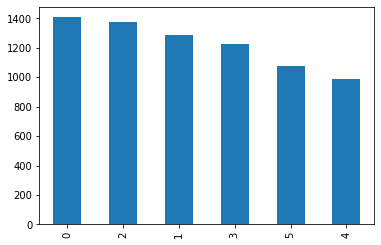

In [42]:
df.label.value_counts().plot.bar()

So, all is set. We have our training data cleaned.

# 4)- Pre-Modeling process

In [43]:
y=df['label']

In [44]:
X=df.drop(['label'], axis=1)

In [45]:
print(y.shape)
print(X.shape)

(7352,)
(7352, 588)


### 4.1)-Normalize data

By this step, we can also minimize our **outlier** problem

In [46]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

In [47]:
X_scaled

array([[-1.73181523, -0.41962845, -0.86881389, ..., -0.23085738,
        -0.24271022, -0.23732223],
       [-1.73134406, -0.25390836, -0.87542555, ..., -0.23085738,
        -0.24271022, -0.23732223],
       [-1.73087288, -0.07629468, -0.86903889, ..., -0.23085738,
        -0.24271022, -0.23732223],
       ...,
       [ 1.73087288,  1.13222107,  0.86297512, ..., -0.23085738,
        -0.24271022, -0.23732223],
       [ 1.73134406, -0.86770988,  0.86092196, ..., -0.23085738,
        -0.24271022, -0.23732223],
       [ 1.73181523, -1.67268082,  0.74919794, ..., -0.23085738,
        -0.24271022, -0.23732223]])

### 4.2)-PCA

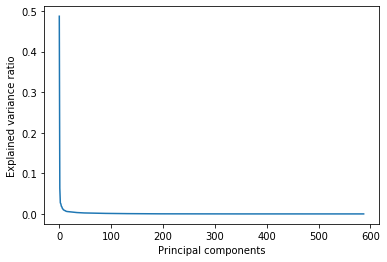

In [48]:
#PCA In Sklearn
from sklearn.decomposition import PCA

pca_full = PCA(n_components = None)
pca_full.fit(X_scaled)

plt.plot(range(0,588), pca_full.explained_variance_ratio_)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
#plt.xticks(np.arange(0,100,5))
plt.show()

We have got a plot which shows no variation after zero.So, we better consider all components.

This happen when data features are not correlated but, random.

### 4.3)- Train and Test split

We could have used our given test data for this as well. Idea is to use this as validation and then see difference of results with test data

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=0)

In [50]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5881, 588)
(1471, 588)
(5881,)
(1471,)


# 5)-Model Building

In [51]:
models = []
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("SVM",SVC()))

**using k-fold**

In [52]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=22)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

NB 1.0
KNN 0.9882681935252877
DT 0.9996598639455783
RF 0.9977896931268262
SVM 0.9982996084681751


Naive Bayes is over fitting. We can see that all our models are giving very good values.

##### How about validation data?

In [53]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=22)
    cv_result = cross_val_score(model,X_test,y_test, cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

NB 1.0
KNN 0.9626218054789485
DT 0.9972789115646259
RF 0.9796056260341974
SVM 0.9959183673469386


[Text(0, 0, 'NB'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'DT'),
 Text(0, 0, 'RF'),
 Text(0, 0, 'SVM')]

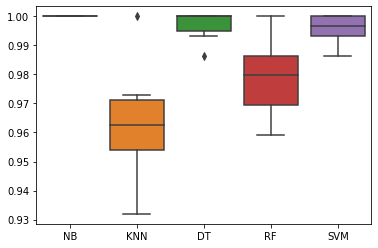

In [54]:
ax = sns.boxplot(data=results)
figsize=(16, 7)
ax.set_xticklabels(names)

**Again Naive bayes showed over fitting. We shall use Decision tree as best performing model**

In [55]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [56]:
y_pred = dt.predict(X_test)
y_pred

array([0, 2, 4, ..., 0, 1, 1])

In [57]:
print(accuracy_score(y_test, y_pred))

0.9986403806934059


##### classification_report

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       285
           1       0.99      1.00      1.00       275
           2       1.00      1.00      1.00       278
           3       1.00      0.99      1.00       244
           4       1.00      1.00      1.00       196
           5       1.00      1.00      1.00       193

    accuracy                           1.00      1471
   macro avg       1.00      1.00      1.00      1471
weighted avg       1.00      1.00      1.00      1471



##### Confusion matrix

In [59]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[285,   0,   0,   0,   0,   0],
       [  0, 275,   0,   0,   0,   0],
       [  0,   0, 278,   0,   0,   0],
       [  0,   2,   0, 242,   0,   0],
       [  0,   0,   0,   0, 196,   0],
       [  0,   0,   0,   0,   0, 193]])

In [60]:
# for normalized results
cm / cm.astype(np.float).sum(axis=1)

array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.00727273, 0.        , 0.99180328, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        ]])

Point to be noted, I called Naive Bayes over fitting for 100% accuracy whereas our most optimal model is giving 100% as well.

- There is difference, accuracy is not 100% but, 0.9993 so there is still chance of error in our preduction.
- Classification report has rounded upto two decimal points and hence it is giving 1.00 otherwise , we might get also some potential of mistake in our precision or recall scores.


# 6)- Model Tunning & Evaluation

In [61]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

##### RandomizedSearchCV

In [62]:
# setup parameters

param_dist = {"criterion": ["gini", "entropy"],
              "min_samples_split": randint(20, 40),
              "max_depth": randint(1, 20),
              "min_samples_leaf": randint(1, 20),
              "max_leaf_nodes": randint(2, 20)}

In [63]:
# instantiate a decision tree
tree= DecisionTreeClassifier()

# instantiate RandomizedSearchCV

tree_cv=RandomizedSearchCV(tree, param_dist,scoring='accuracy', cv=5)

In [64]:
# fit on model
tree_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best')

In [65]:
# print tuned parameters and accuracy score

print("Tuned Decision Tree Parameters:{}".format(tree_cv.best_params_))
print("Best Score:{}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters:{'criterion': 'gini', 'max_depth': 9, 'max_leaf_nodes': 15, 'min_samples_leaf': 5, 'min_samples_split': 38}
Best Score:0.9993198435640197


In [66]:
tree_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                       max_features=None, max_leaf_nodes=15,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=38,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [67]:
y_pred_randomsearch=tree_cv.predict(X_test)

In [68]:
y_pred_randomsearch[:5]

array([0, 2, 4, 2, 0])

# 7)- Applying Neural Network

Let's bring neural network into game !

In [69]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

In [70]:
X_train.shape[1]

588

In [71]:
#Encoding y-labeled feature

from keras.utils import np_utils
def one_hot_encode_object_array(arr):
    '''One hot encode a numpy array of objects (e.g. strings)'''
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))

y_train_ohe=one_hot_encode_object_array(y_train)
y_test_ohe=one_hot_encode_object_array(y_test)

In [72]:
y_train[:5]

2591    1
6002    3
5381    3
4338    4
6597    4
Name: label, dtype: category
Categories (6, int64): [0, 1, 2, 3, 4, 5]

In [73]:
y_train_ohe[:5]

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [74]:
unique_y_labels = list(y_train.value_counts().index)
unique_y_labels

[0, 2, 1, 3, 5, 4]

In [75]:
len(unique_y_labels)

6

**Hence , our last dense layer will be of size 6**

##### Build LSTM model

In [76]:
embed_dim = 128
lstm_out = 196
max_fatures = 2000
size_of_each_vect=X_train.shape[1]
uniq_y_label=len(unique_y_labels)

In [77]:
model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = size_of_each_vect))
# X.shape[1] refers to 588 columns 
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(uniq_y_label,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 588, 128)          256000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 588, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 1182      
Total params: 511,982
Trainable params: 511,982
Non-trainable params: 0
_________________________________________________________________
None


Let's keep it simple. Not too many deep layers created

##### Train model

In [78]:
batch_size = 32
epochs = 20

In [79]:
from keras.callbacks import EarlyStopping

In [80]:
#history = model.fit(X_train, y_train_ohe, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Takes extra time to train so, I didn't finish training part.

##### Predict and Evaluate

In [81]:
"""

y_pred = model.predict(X_test)
## predict crisp classes for test set. Output will be 1-D
y_test_class = np.argmax(y_test_ohe,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)
loss, accuracy = model.evaluate(X_train, y_train_ohe, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training Loss: {:.4f}".format(loss))
loss, accuracy = model.evaluate(X_test, y_test_ohe, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("Testing Loss:  {:.4f}".format(loss))
print(classification_report(y_test_class,y_pred_class))


"""

'\n\ny_pred = model.predict(X_test)\n## predict crisp classes for test set. Output will be 1-D\ny_test_class = np.argmax(y_test_ohe,axis=1)\ny_pred_class = np.argmax(y_pred,axis=1)\nloss, accuracy = model.evaluate(X_train, y_train_ohe, verbose=False)\nprint("Training Accuracy: {:.4f}".format(accuracy))\nprint("Training Loss: {:.4f}".format(loss))\nloss, accuracy = model.evaluate(X_test, y_test_ohe, verbose=False)\nprint("Testing Accuracy:  {:.4f}".format(accuracy))\nprint("Testing Loss:  {:.4f}".format(loss))\nprint(classification_report(y_test_class,y_pred_class))\n\n\n'

# 8)- Submission

With these results , we can compare with our given test dataset.What we need to do is to take care of all major data pre-processing steps i.e to encode categorical variables, check missing values, use data scaling and finally apply our trained model to test dataset. This way we can directly compare results what are actually given (as of ground truth) and results that we predict. With an accuracy score of 0.99, I am sure we shall get pretty close results as are given in test.csv

Due to shortage of time, I am unable to perform all these steps. I have given concept of what I intended to do in next stages. 

In [82]:
df_test.head()

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v556,v557,v558,v559,v560,v561,v562,v563,v564,label
0,0,i,-0.014654,-0.938404,-0.920091,0,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.825886,0.271151,-0.720009,0.276801,-0.057978,B,0.257178,-0.667683,-0.023285,2
1,1,h,-0.119083,-0.975415,-0.967458,0,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.434375,0.920593,-0.698091,0.281343,-0.083898,B,0.286027,-0.944958,-0.013163,2
2,2,h,-0.118152,-0.993819,-0.969926,0,-0.994403,-0.970735,-0.963483,-0.939260,...,0.064103,0.145068,-0.702771,0.280083,-0.079346,B,0.275485,-0.962748,-0.026050,2
3,3,f,-0.117520,-0.994743,-0.973268,0,-0.995274,-0.974471,-0.968897,-0.938610,...,0.340134,0.296407,-0.698954,0.284114,-0.077108,B,0.270298,-0.967091,-0.032614,2
4,4,e,-0.129527,-0.993852,-0.967445,0,-0.994111,-0.965953,-0.977346,-0.938610,...,0.736715,-0.118545,-0.692245,0.290722,-0.073857,B,0.274833,-0.978295,-0.027848,2


In [83]:
df_test.describe(include=['object', 'bool'])

,v1,v561
count,2947,2947
unique,6,9
top,d,X
freq,524,381


In [84]:
# encoding categorical variables
df_test=pd.get_dummies(df_test,columns=['v1'], drop_first=True)
df_test=pd.get_dummies(df_test,columns=['v561'], drop_first=True)

In [85]:
summary_missing(df_test)

No. of fields:  2947
No. of missing fields:  3


,No. of mising Value,%age of missing Value
v11,20,0.7
v12,12,0.4
v9,12,0.4


We have fewer missing values as compared to our training data. Still we better take care of them

**What I did and What I couldn't do**

- I checked data and found couple of classical issues such as encoding categorical variables, fixing missing values, normalize data, checking if there are any erronous values in data, sanity check, duplicate values

- Mostly I like to apply one by one ML model but, K-fold does great job and it provided us results clearly. It took some time due to computation but, it was not that long process

- I wanted to try PCA as there were too many variables and there was a high chance that data is correlated. If data is random then PCA does not work . We use Factor machine technique then. I strongly suspect that features would be related. I tried correlation but, my system got stuck twice. So I left

- PCA also didnt work. There was no use of it. I kept it for sake of discussion and also it was interesting to give it a chance

- I could not try other techniques like Boosting. I only used ML and ensemble methods like Random Forest. But, it could be interesting to explore more

- I wanted to apply deep learning using tensorflow 2.0 and then compare result with ML model. It couldn't manage that.

- On submission step, I wanted to compare test data and see how well my validation dataset has performed. I will do it anyway after this test at my own.

- I wish I could have written notebook with less mistakes. I only wanted to put ideas on paper and hence, there is a high chance of spelling or grammar mistakes.

- Finally, I pay my gratitude to give me a chance. I learnt how to code and to get result in such restricted time. I really hope that you will also enjoy my work .

**END OF NOTEBOOK**